In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

plt.rcParams["figure.figsize"] = (12,6)

covid_stats = pd.read_csv('stats/covid_stats.csv')
gp_stats = pd.read_csv('stats/gp_stats.csv')
migranti_stats = pd.read_csv('stats/migranti_stats.csv')

## Covid stats

In [10]:
dot_covid_stats = covid_stats.apply(lambda x: x.str.replace(',','.'))
dot_covid_stats

,Dataset,FC mean,FC median,RC mean,RC median,FC std,RC std
0,ds1,21.39,7.00,6.70,3.00,43.68,10.14
1,ds2,22.36,6.00,7.83,3.00,61.61,19.86
2,ds3,19.13,7.00,6.42,3.00,46.69,17.94
3,ds4,19.17,7.00,6.21,3.00,40.63,10.96
4,ds5,14.73,7.00,5.89,3.00,36.93,20.91
5,ds6,22.88,7.00,7.95,3.00,67.99,25.65
6,ds7,22.59,7.00,7.68,3.00,67.04,28.11


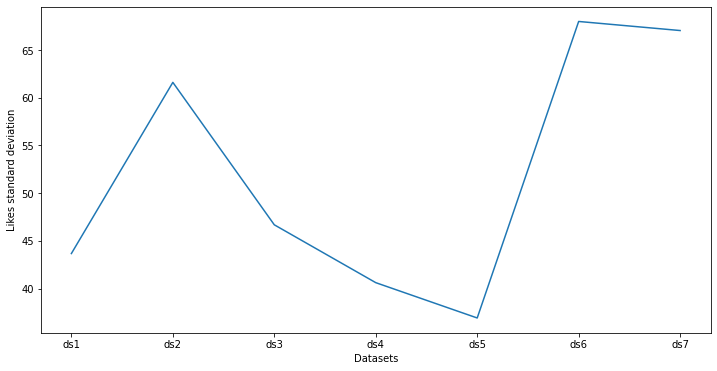

In [11]:
x_values = dot_covid_stats['Dataset']
y_values = np.array(dot_covid_stats['FC std']).astype(float)

plt.plot(x_values, y_values)
plt.xlabel('Datasets')
plt.ylabel('Likes standard deviation')
plt.show()

## GP stats

In [12]:
dot_gp_stats = gp_stats.apply(lambda x: x.str.replace(',','.'))
dot_gp_stats

,Dataset,FC mean,FC median,RC mean,RC median,FC std,RC std
0,ds1,36.75,12.50,8.70,4.50,93.62,16.28
1,ds2,19.45,10.00,5.33,3.00,27.36,5.62
2,ds3,72.54,13.00,21.21,4.00,261.44,85.55
3,ds4,19.69,7.00,6.48,3.00,32.30,9.24
4,ds5,41.76,11.00,8.80,3.00,151.94,27.47
5,ds6,35.10,10.50,7.78,3.00,70.05,14.61
6,ds7,20.95,7.00,5.50,3.00,44.75,9.53


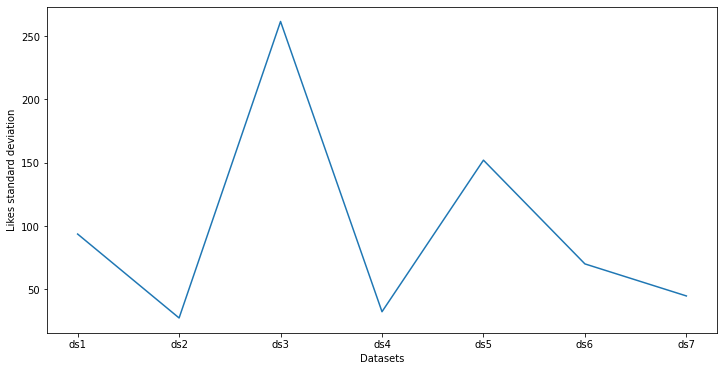

In [13]:
x_values = dot_gp_stats['Dataset']
y_values = list(map(float, dot_gp_stats['FC std']))

plt.plot(x_values, y_values)
plt.xlabel('Datasets')
plt.ylabel('Likes standard deviation')
plt.show()

## Migranti stats

In [14]:
dot_migranti_stats = migranti_stats.apply(lambda x: x.str.replace(',','.'))
dot_migranti_stats

,Dataset,FC mean,FC median,RC mean,RC median,FC std,RC std
0,ds1,15.30,9.00,7.06,5.00,18.01,6.49
1,ds2,15.88,7.50,6.29,4.50,21.30,8.29
2,ds3,31.49,9.00,14.05,5.00,73.21,23.55
3,ds4,14.95,10.00,6.26,4.00,18.19,5.97
4,ds5,12.70,8.00,4.78,3.00,13.68,5.60
5,ds6,17.00,10.00,5.50,3.00,24.54,5.50
6,ds7,18.86,13.00,4.43,2.00,24.45,5.91


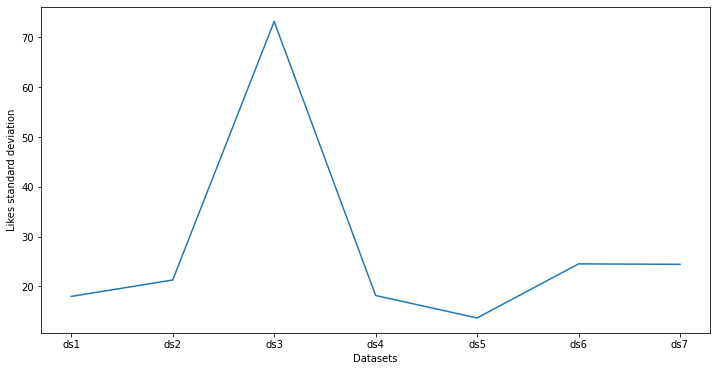

In [15]:
x_values = dot_migranti_stats['Dataset']
y_values = list(map(float, dot_migranti_stats['FC std']))

plt.plot(x_values, y_values)
plt.xlabel('Datasets')
plt.ylabel('Likes standard deviation')
plt.show()

## All datasets

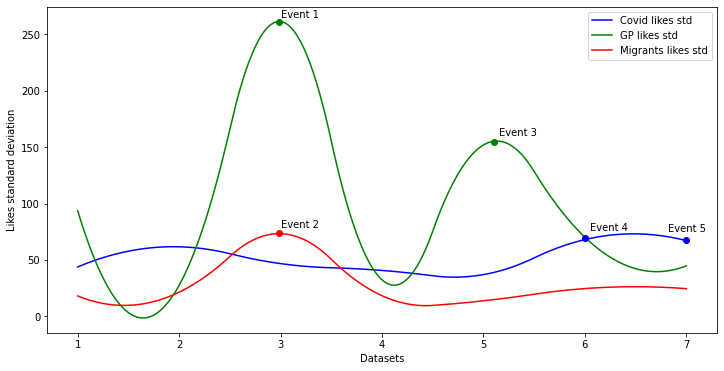

In [66]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y1 = np.array(dot_covid_stats['FC std']).astype(float)
y2 = np.array(dot_gp_stats['FC std']).astype(float)
y3 = np.array(dot_migranti_stats['FC std']).astype(float)

xnew = np.linspace(x.min(), x.max(), 200)

spl1 = make_interp_spline(x, y1, k=2)
spl2 = make_interp_spline(x, y2, k=2)
spl3 = make_interp_spline(x, y3, k=2)
y1_smooth = spl1(xnew)
y2_smooth = spl2(xnew)
y3_smooth = spl3(xnew)

plt.plot(xnew, y1_smooth, color='b', label='Covid likes std')
plt.plot(xnew, y2_smooth, color='g', label='GP likes std')
plt.plot(xnew, y3_smooth, color='r', label='Migrants likes std')
plt.plot(2.98,261,"go")
plt.text(3,265,'Event 1')
plt.plot(2.98,74,"or")
plt.text(3,79,'Event 2')
plt.plot(5.10,155,"go")
plt.text(5.15,160,'Event 3')
plt.plot(6,69,"bo")
plt.text(6.05,76,'Event 4')
plt.plot(7,68,"bo")
plt.text(6.82,75,'Event 5')
plt.xlabel('Datasets')
plt.ylabel('Likes standard deviation')
plt.legend()
plt.show()